
# Diseño de software para cómputo científico

----

## Unidad 6: Integración continua


## Integración continua

- La integración continua (CI) es la práctica de fusionar más de una vez al día todas las copias de trabajo de los desarrolladores en una línea principal compartida.
- El objetivo principal de CI es evitar el "infierno de integración".
- Posteriormente se introdujo los servidores de compilación, que ejecutan automáticamente los test unitarias después de cada commit. e informaban los resultados a los desarrolladores.
- Generalmente se usa el CI  implementar procesos continuos de aplicación de control de calidad en general.
- Sin integración continua un proyecto hoy casi que es no es confiable.

Si esto todavia no les suena mucho a TOX, debería.

## Servidores de integración continua

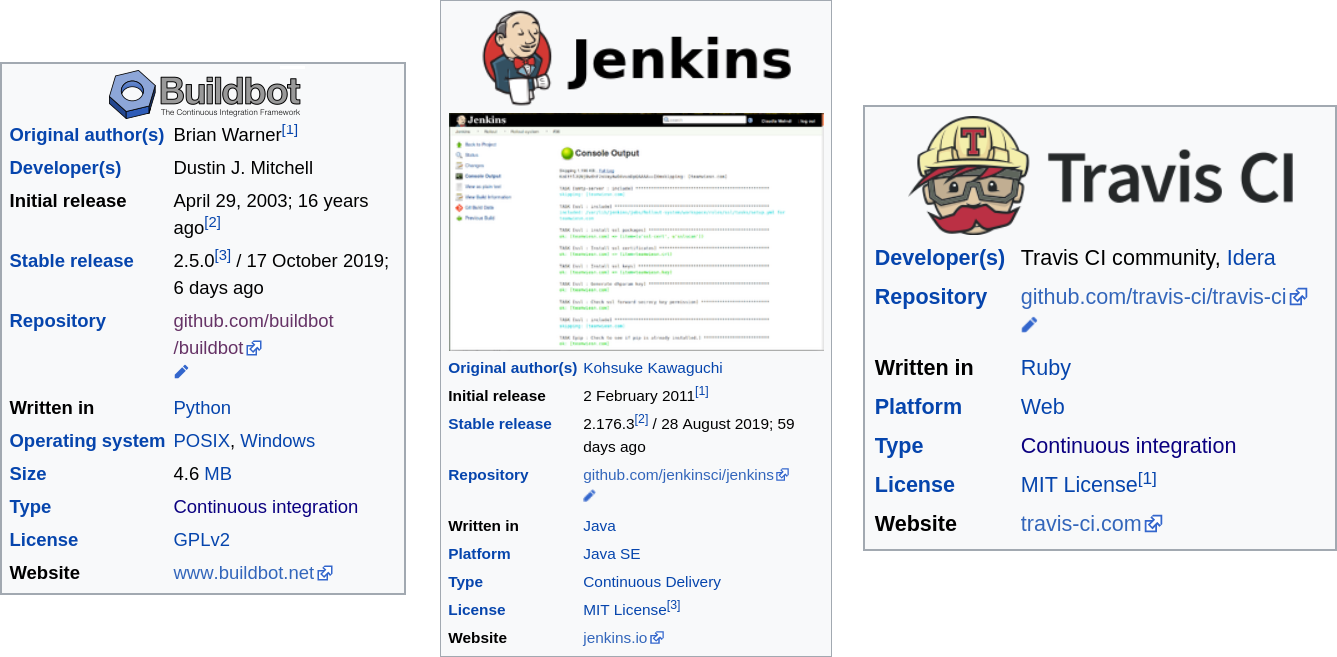

## Vamos con Travis

- El proyecto es software libre alojado en Github propiedad de Idera.
- Idera brindaun servicio de CI utilizado para construir y probar proyectos de software alojados en GitHub.
- Es gratis para software libre.
- Se configura con un archivo formato YAML llamado `.travis.yml`.

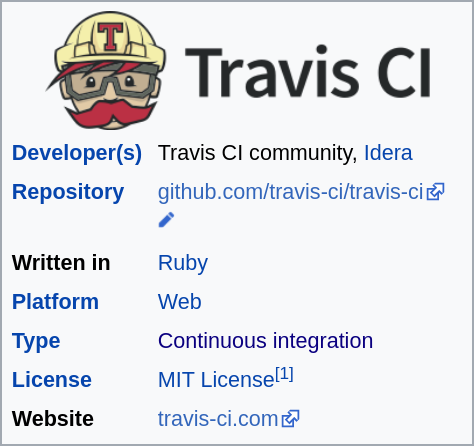


## Ejemplo de .travis.yml

```yaml
# Disable sudo to speed up the build
sudo: false

# Set the build language to Python
language: python

# Set the python version to 2.7
python: 3.7

# Install the codecov pip dependency
install:
  - pip install codecov

# Run the unit test
script:
  - coverage run tests.py
 ```

## Integración con `TOX` y ejemplo con `pert.py`

```yaml
language: python
sudo: false
install:
  - pip install tox
script:
  - tox -r
matrix:
    include:
        - python: 3.7
          env: TOXENV=style
          dist: xenial
          sudo: true
        - python: 3.7
          env: TOXENV=coverage
          dist: xenial
          sudo: true
        - python: 3.6
          env: TOXENV=py36
        - python: 3.7
          env: TOXENV=py37
          dist: xenial
          sudo: true
```

Ahora a configurar travis y el README.

## Agamos fallar a travis

- Agreguemos un chequo de documentación en `tox.ini`

```ini
[tox]
envlist = py37, py36, style, coverage, docstyle
...
[testenv:docstyle]
deps = pydocstyle
commands =
    pydocstyle pert.py
```

- Ahora agregamos un environment mas a matrix de `.travis.yml`

```yaml
 - python: 3.7
   env: TOXENV=docstyle
   dist: xenial
   sudo: true
```

- Y le damos a **commit** y **push**

## Consideraciones

- La integración continua **NO** es opcional.
- Se pueden configurar builds por branch.
- Existe el concepto de Deployment continuo.
- Que un build este roto no significa nada malo a priori.
- Nunca hacer **push** un viernes de tarde.

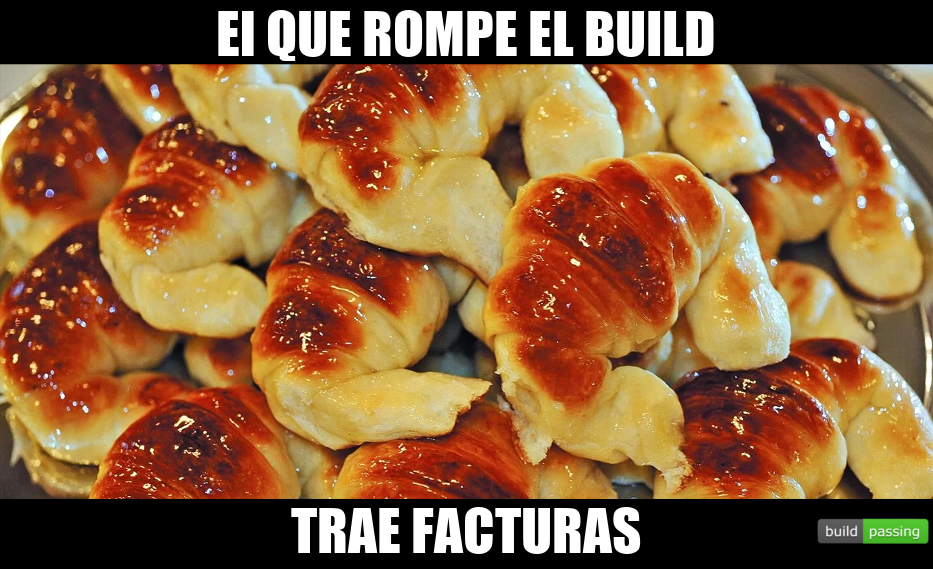

## Referencias

- https://en.wikipedia.org/wiki/Continuous_integration
- https://en.wikipedia.org/wiki/Comparison_of_continuous_integration_software
- https://en.wikipedia.org/wiki/Travis_CI
- https://en.wikipedia.org/wiki/Jenkins_(software)
- https://en.wikipedia.org/wiki/Buildbot